In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import plot_roc_curve

In [3]:
X_test = pd.read_csv('datosParaModelo\X_test.csv')
y_test = pd.read_csv('datosParaModelo\y_test.csv')
x_val = pd.read_csv('datosParaModelo\X_val.csv')
y_val = pd.read_csv('datosParaModelo\y_val.csv')

<h1>Carga de modelos</h1>

In [5]:
ruta_random_forest = 'modelos\modelRandomForestC_85.pkl'
modelRandomForestC = pickle.load(open(ruta_random_forest, 'rb'))

In [6]:
ruta_gradient_boost = 'modelos\modelGradientBoostC_85.pkl'
modelGradientBoostC = pickle.load(open(ruta_gradient_boost, 'rb'))

In [7]:
ruta_knn = 'modelos\modelKNNC_82.pkl'
modelKNN = pickle.load(open(ruta_knn, 'rb'))

<h1>Algunas metricas y graficas de Gradiente Boost Classifier<h2>

In [7]:
boost_pred = modelGradientBoostC.predict(X_test)

In [8]:
print('Gradient Score: ', modelGradientBoostC.score(X_test, y_test))
print('MAE Gradient: ', mean_absolute_error(y_test, boost_pred))
print('MSE Gradient: ', mean_squared_error(y_test, boost_pred))

Gradient Score:  0.8551654597121643
MAE Gradient:  0.14483454028783574
MSE Gradient:  0.14483454028783574


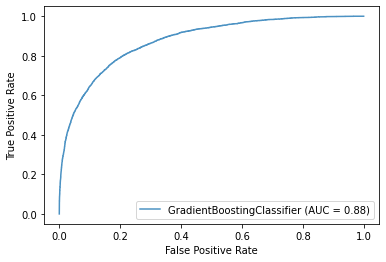

In [9]:
ax = plt.gca()
gbc_disp = plot_roc_curve(modelGradientBoostC, X_test, y_test, ax=ax, alpha=0.8)

<h1>Algunas metricas y graficas de KNNC<h2>

In [10]:
y_pred_knn = modelKNN.predict(X_test)

In [11]:
print('KNNC Score: ', modelKNN.score(X_test, y_test))
print('MAE KNNC: ', mean_absolute_error(y_test, y_pred_knn))
print('MSE KNNC: ', mean_squared_error(y_test, y_pred_knn))

KNNC Score:  0.8266568888074067
MAE KNNC:  0.17334311119259327
MSE KNNC:  0.17334311119259327


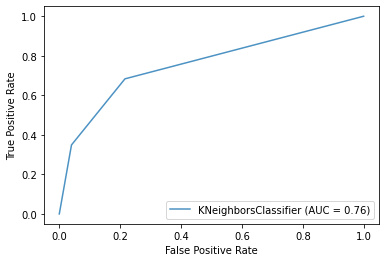

In [12]:
ax = plt.gca()
knnc_disp = plot_roc_curve(modelKNN, X_test, y_test, ax=ax, alpha=0.8)

<h1>Algunas metricas y graficas de RandomForest<h2>

In [13]:
y_pred_forest = modelRandomForestC.predict(X_test)

In [14]:
print('RandomForestC Score: ', modelRandomForestC.score(X_test, y_test))
print('MAE RandomForestC: ', mean_absolute_error(y_test, y_pred_forest))
print('MSE RandomForestC: ', mean_squared_error(y_test, y_pred_forest))

RandomForestC Score:  0.8524612705105876
MAE RandomForestC:  0.1475387294894124
MSE RandomForestC:  0.1475387294894124


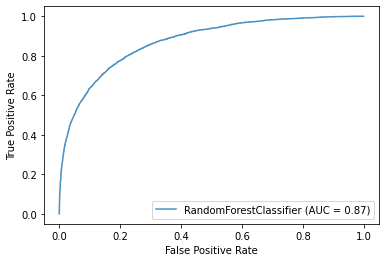

In [15]:
ax = plt.gca()
rfc_disp = plot_roc_curve(modelRandomForestC, X_test, y_test, ax=ax, alpha=0.8)

<h1>Comparacion grafica</h1>

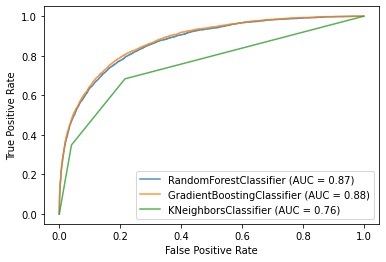

In [16]:
ax = plt.gca()
rfc_disp = plot_roc_curve(modelRandomForestC, X_test, y_test, ax=ax, alpha=0.8)
gbc_disp.plot(ax=ax, alpha=0.8)
knnc_disp.plot(ax=ax, alpha=0.8)

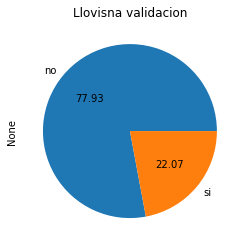

In [64]:
y_val.value_counts().plot.pie(labels=['no','si'], autopct='%.2f')
plt.title('Llovisna validacion')
plt.show()

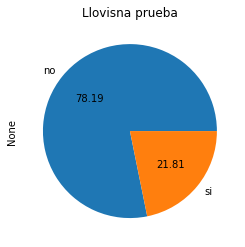

In [63]:
y_test.value_counts().plot.pie(labels=['no','si'], autopct='%.2f')
plt.title('Llovisna prueba')
plt.show()

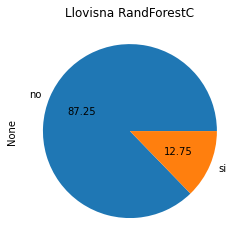

In [58]:
pd.value_counts(y_pred_forest).plot.pie(labels=['no','si'], autopct='%.2f')
plt.title('Llovisna RandForestC')
plt.show()

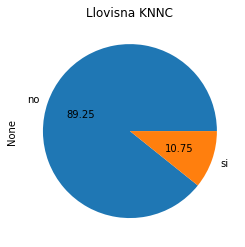

In [57]:
pd.value_counts(y_pred_knn).plot.pie(labels=['no','si'], autopct='%.2f')
plt.title('Llovisna KNNC')
plt.show()

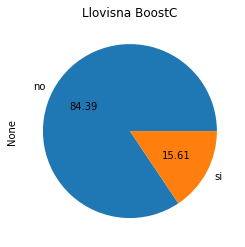

In [56]:
pd.value_counts(boost_pred).plot.pie(labels=['no','si'], autopct='%.2f')
plt.title('Llovisna BoostC')
plt.show()